In [2]:
import tensorflow as tf
import pandas as pd
%matplotlib inline

In [3]:
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1Ngwde6mziKecl_j2dCmyG5plFJ9XJzLS' -O "one_hot_fb_post.csv"

'wget' is not recognized as an internal or external command,
operable program or batch file.
'id' is not recognized as an internal or external command,
operable program or batch file.


In [4]:
vocab_size = 2000
embedding_dim = 12
max_length = 300
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_portion = 1.0

In [5]:
sentences = []
labels = []
stopwords = [ "a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as", "at", "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "could", "did", "do", "does", "doing", "down", "during", "each", "few", "for", "from", "further", "had", "has", "have", "having", "he", "he'd", "he'll", "he's", "her", "here", "here's", "hers", "herself", "him", "himself", "his", "how", "how's", "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into", "is", "it", "it's", "its", "itself", "let's", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only", "or", "other", "ought", "our", "ours", "ourselves", "out", "over", "own", "same", "she", "she'd", "she'll", "she's", "should", "so", "some", "such", "than", "that", "that's", "the", "their", "theirs", "them", "themselves", "then", "there", "there's", "these", "they", "they'd", "they'll", "they're", "they've", "this", "those", "through", "to", "too", "under", "until", "up", "very", "was", "we", "we'd", "we'll", "we're", "we've", "were", "what", "what's", "when", "when's", "where", "where's", "which", "while", "who", "who's", "whom", "why", "why's", "with", "would", "you", "you'd", "you'll", "you're", "you've", "your", "yours", "yourself", "yourselves" ]
# print(len(stopwords))

In [6]:
import csv
with open("1500_FB_ads_GoldLabel.csv", 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    next(reader)
    for row in reader:
        #print(row[8],row[12])
        labels.append(str(row[10])) # the 10th categrey
        sentence = row[0]
        for word in stopwords:
            token = " " + word + " "
            sentence = sentence.replace(token, " ")
        sentences.append(sentence)

In [7]:
sentences[0]

'gulf oman incident pretext war iran war unmitigated disaster united states iran region world unilateral attack iran illegal unconstitutional'

In [8]:
df = pd.read_csv('1500_FB_ads_GoldLabel.csv')
df.head()

,text,label,economic,environment,foreign policy,governance,immigration,military,safety,social programs,social and cultural
0,gulf oman incident pretext war iran war unmiti...,foreign policy,0,0,1,0,0,0,0,0,0
1,girlboss love good conversation women sideline...,"economic,social and cultural",1,0,0,0,0,0,0,0,1
2,problem massive urgent global climate change s...,environment,0,1,0,0,0,0,0,0,0
3,friend hope clear women history month matters ...,"economic,social and cultural",1,0,0,0,0,0,0,0,1
4,ten days ll stage debate 2 3 democratic voters...,social programs,0,0,0,0,0,0,0,1,0


In [9]:
train_sentences = sentences[:]
train_labels = labels[:]

print(len(train_sentences))
print(len(train_labels))
print(train_sentences[0])
print(train_labels[0])

1499
1499
gulf oman incident pretext war iran war unmitigated disaster united states iran region world unilateral attack iran illegal unconstitutional
0


In [10]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train_sentences)
word_index = tokenizer.word_index

train_sequences = tokenizer.texts_to_sequences(train_sentences)
train_padded = pad_sequences(train_sequences, padding=padding_type, maxlen=max_length)


In [11]:
import numpy as np
label_tokenizer = Tokenizer()
label_tokenizer.fit_on_texts(labels)

training_label_seq = np.array(label_tokenizer.texts_to_sequences(train_labels))


print(training_label_seq[0])
print(training_label_seq[1])
print(training_label_seq[2])
print(training_label_seq.shape)


[1]
[2]
[1]
(1499, 1)


In [12]:
print(train_padded[0])
print(training_label_seq[1])

[1816    1    1    1  196  868  196    1  782  101   50  868 1285   82
    1  305  868  974  869    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0 

In [13]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')
])
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 300, 12)           24000     
_________________________________________________________________
global_average_pooling1d (Gl (None, 12)                0         
_________________________________________________________________
dense (Dense)                (None, 24)                312       
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 150       
Total params: 24,462
Trainable params: 24,462
Non-trainable params: 0
_________________________________________________________________


In [14]:
num_epochs = 20
history = model.fit(train_padded, training_label_seq, epochs=num_epochs, verbose=1)

Train on 1499 samples
Epoch 1/20
1499/1499 [==============================] - 1s 353us/sample - loss: 1.6438 - accuracy: 0.8286
Epoch 2/20
1499/1499 [==============================] - 0s 78us/sample - loss: 1.1636 - accuracy: 0.8659
Epoch 3/20
1499/1499 [==============================] - 0s 81us/sample - loss: 0.6183 - accuracy: 0.8659
Epoch 4/20
1499/1499 [==============================] - 0s 94us/sample - loss: 0.4628 - accuracy: 0.8659
Epoch 5/20
1499/1499 [==============================] - 0s 142us/sample - loss: 0.4287 - accuracy: 0.8659
Epoch 6/20
1499/1499 [==============================] - 0s 98us/sample - loss: 0.4125 - accuracy: 0.8659
Epoch 7/20
1499/1499 [==============================] - 0s 132us/sample - loss: 0.4035 - accuracy: 0.8659
Epoch 8/20
1499/1499 [==============================] - 0s 109us/sample - loss: 0.3981 - accuracy: 0.8659
Epoch 9/20
1499/1499 [==============================] - 0s 98us/sample - loss: 0.3947 - accuracy: 0.8659
Epoch 10/20
1499/1499 [======

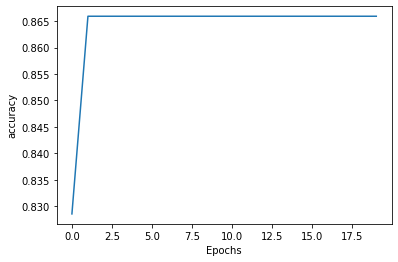

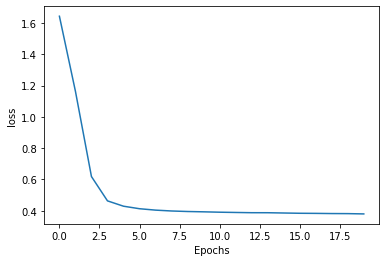

In [15]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [16]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_sentence(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

In [17]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)

# Expected output
# (1000, 16)

(2000, 12)


In [18]:
import io

out_v = io.open('vecs8.tsv', 'w', encoding='utf-8')
out_m = io.open('meta8.tsv', 'w', encoding='utf-8')
for word_num in range(1, vocab_size):
  word = reverse_word_index[word_num]
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

In [19]:
try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download('vecs5.tsv')
  files.download('meta5.tsv')